# Customer Churn Analysis

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Reading dataset

In [3]:
dataset=pd.read_csv("../customer_churn_dataset.csv")

### Sanity check including upper two rows for checking all the features

In [4]:
dataset.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Churn
0,Cust_1,Male,0.0,Yes,No,2.0,Yes,No,NaN,No,No internet service,1
1,Cust_2,Female,1.0,No,No,NaN,Yes,No,Fiber optic,Yes,Yes,0


In [5]:
dataset.describe()

,SeniorCitizen,tenure,Churn
count,9000.000000,9000.000000,10000.000000
mean,0.500111,36.459889,0.502000
std,0.500028,20.691516,0.500021
min,0.000000,1.000000,0.000000
25%,0.000000,19.000000,0.000000
50%,1.000000,37.000000,1.000000
75%,1.000000,54.000000,1.000000
max,1.000000,72.000000,1.000000


## Dataset preprocessing

In [6]:
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

### Visualizing missing value

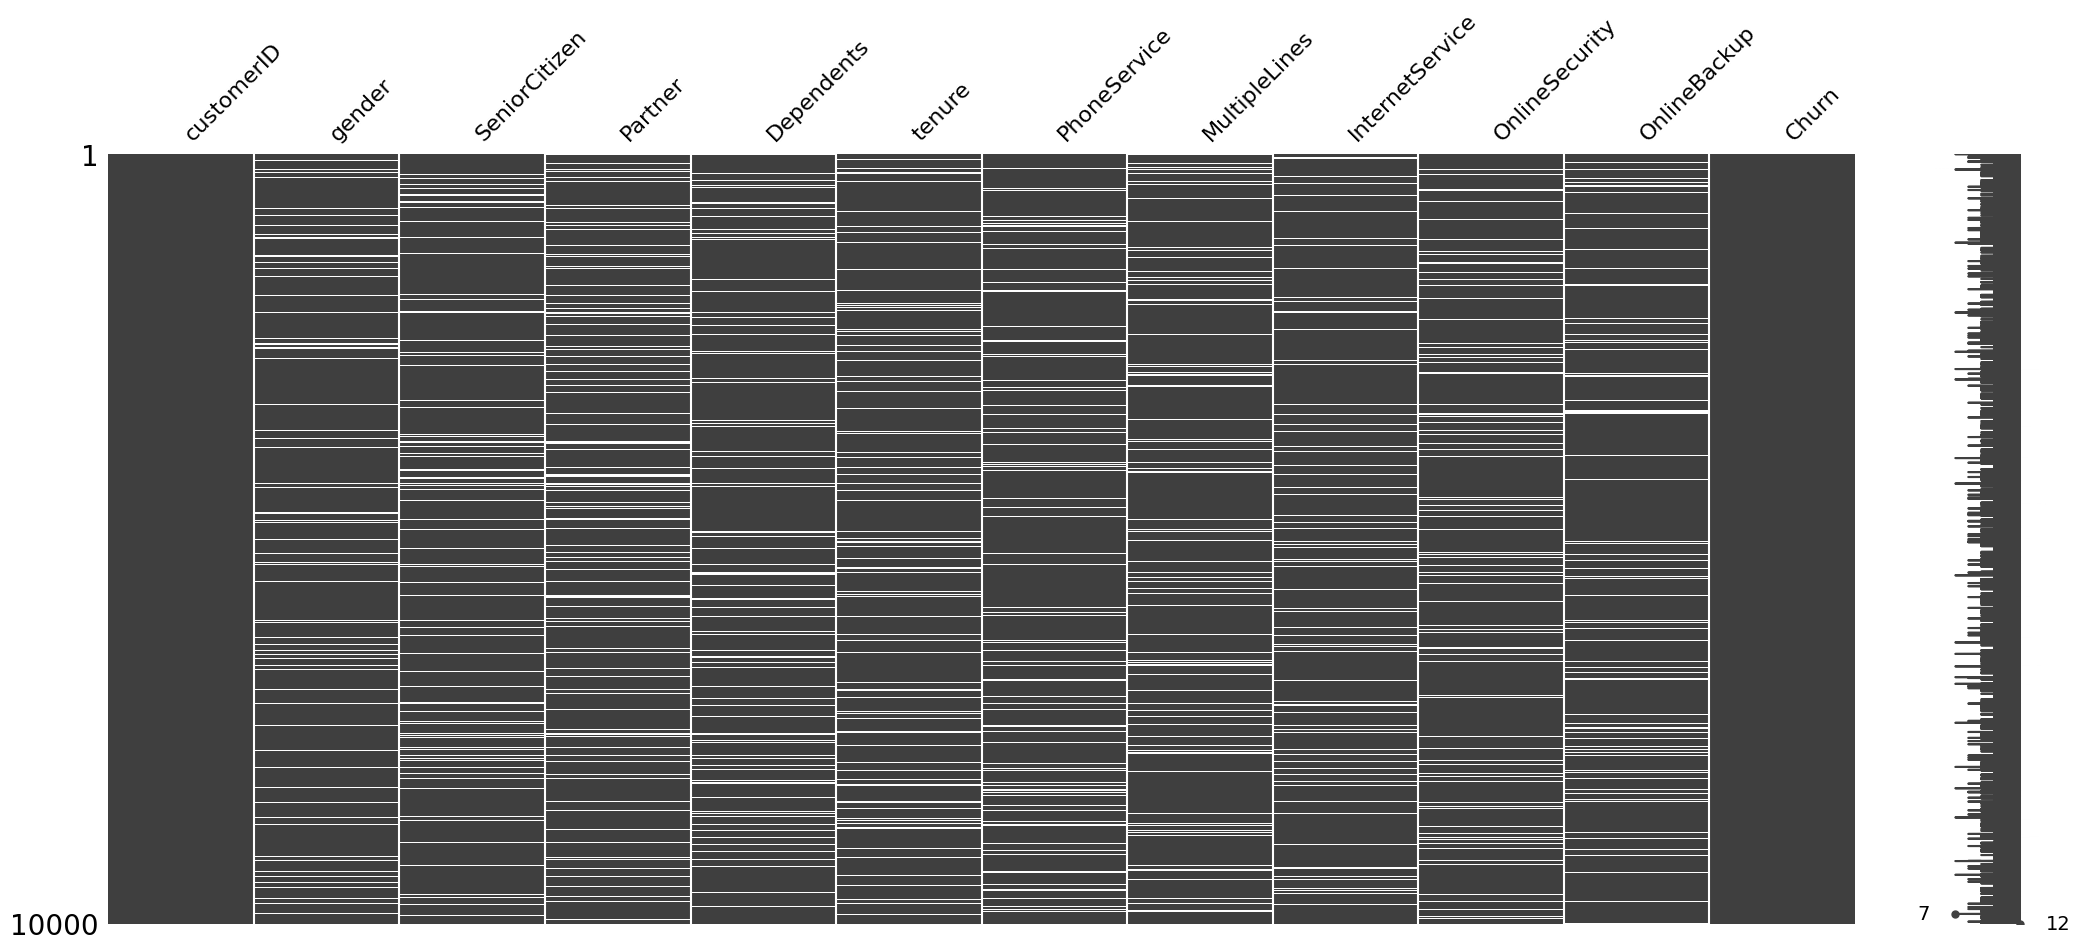

In [7]:
msno.matrix(dataset)
plt.show()

### Distribution of target variable

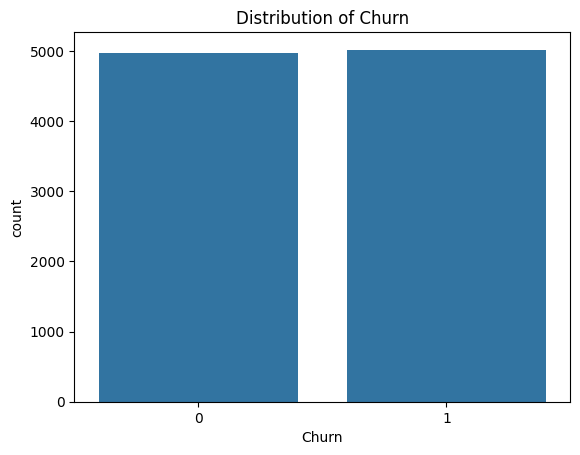

In [8]:
sns.countplot(x='Churn', data=dataset)
plt.title('Distribution of Churn')
plt.show()


As both classes are almost equal there is no problem of class imbalance

### Distribution of numerical feature

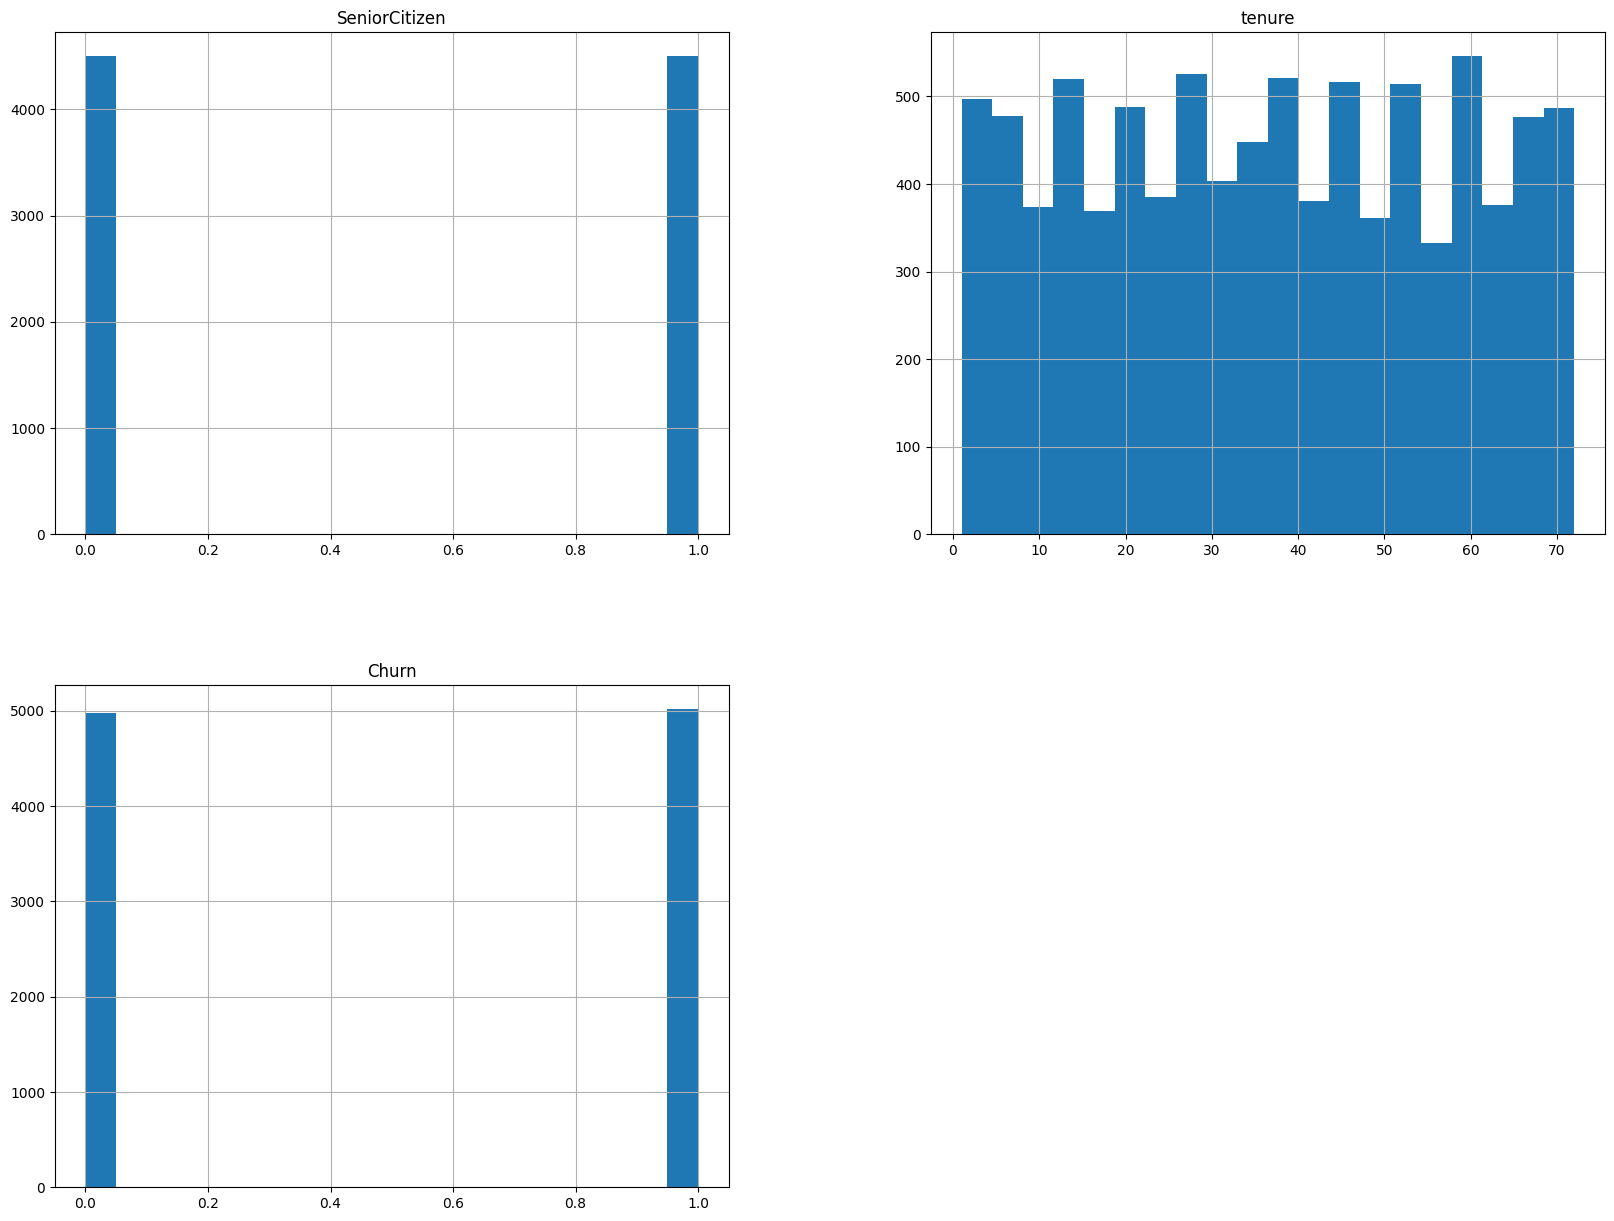

In [9]:
dataset.hist(bins=20, figsize=(20, 15))
plt.show()

### Distribution of Categorical features

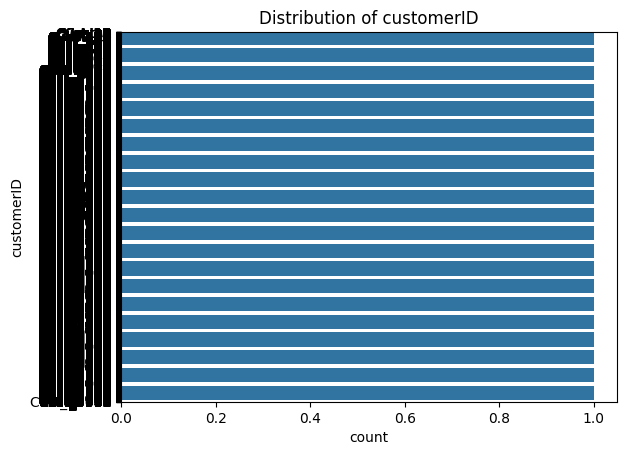

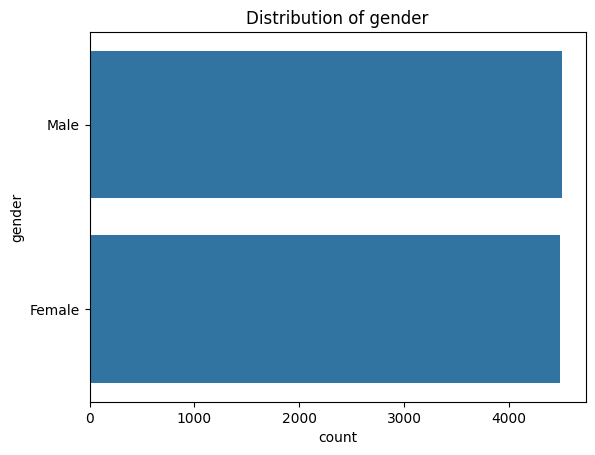

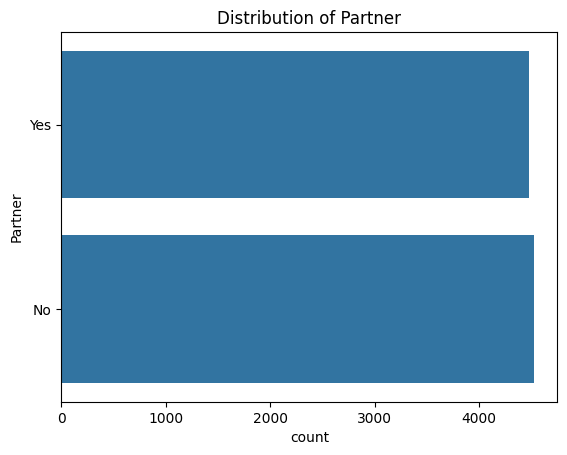

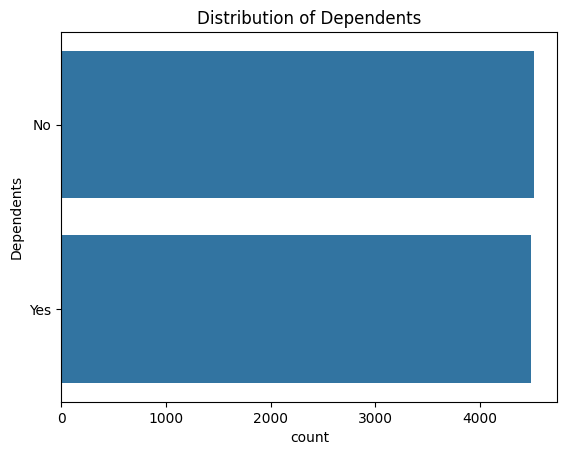

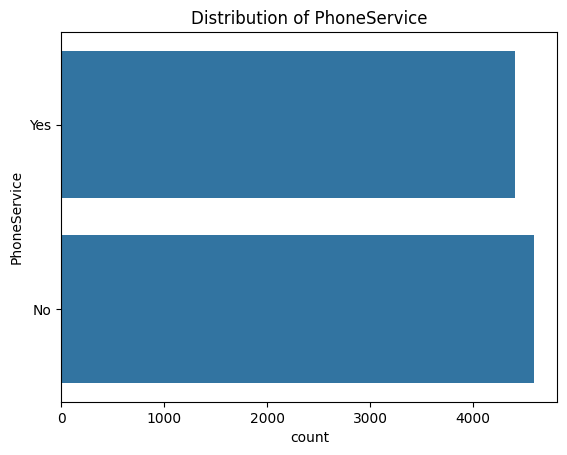

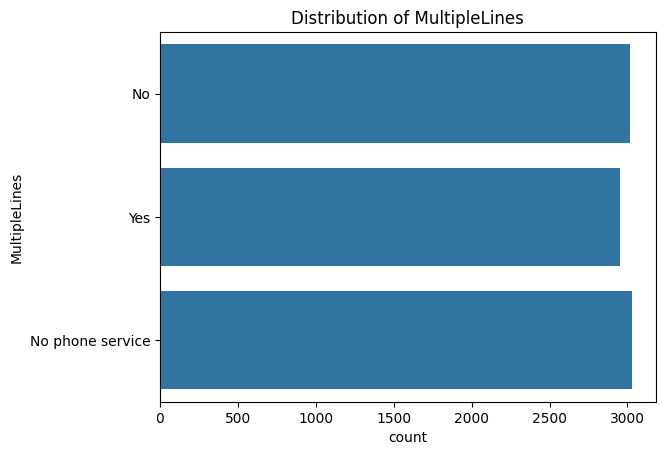

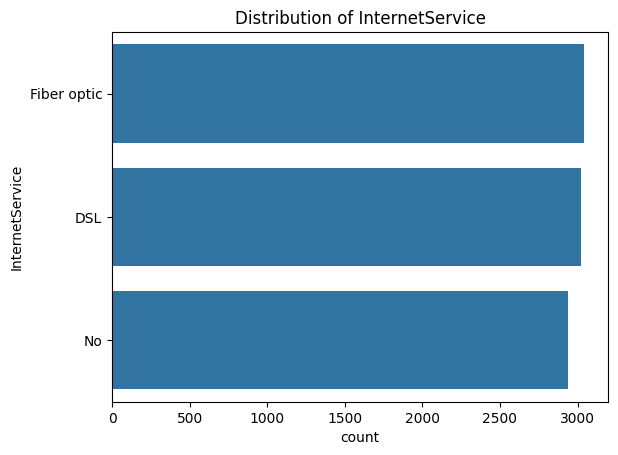

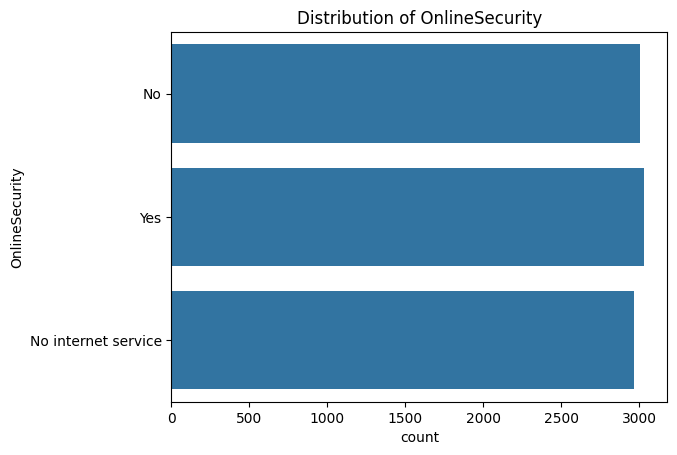

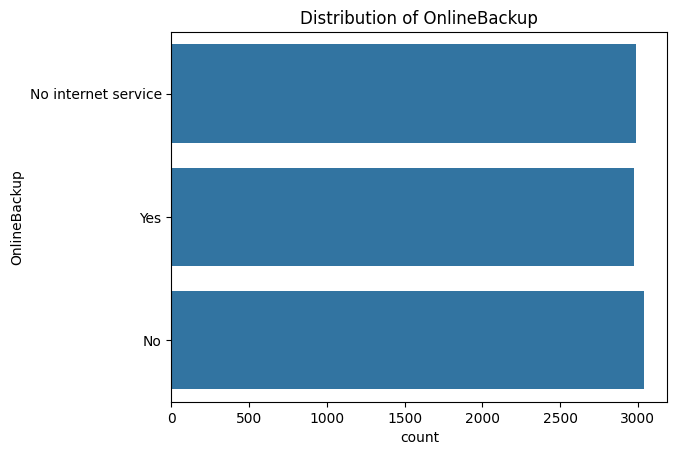

In [10]:
for column in dataset.select_dtypes(include=['object']).columns:
    sns.countplot(y=column, data=dataset)
    plt.title(f'Distribution of {column}')
    plt.show()


### Correlation analysis

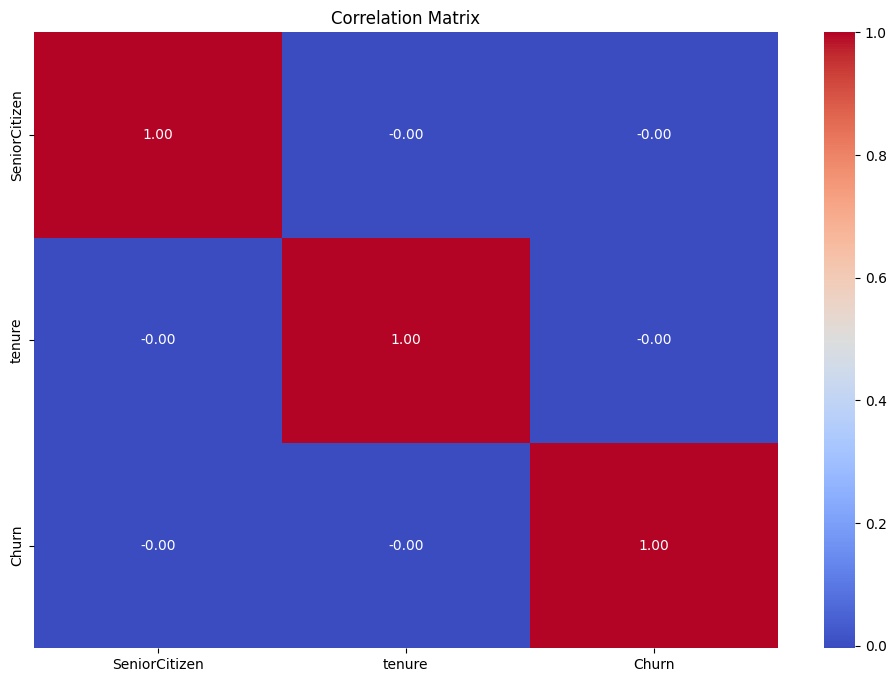

In [11]:
# Select only numerical columns for correlation analysis
numerical_df = dataset.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


Correlational analysis helps identify multicollinearity, which occurs when two or more features are highly correlated with each other. In machine learning, multicollinearity can lead to several issues:

- Redundancy: Highly correlated features carry similar information, leading to redundancy. Including both might not add significant value to the model and can unnecessarily increase the model's complexity.
- Model Interpretation: In models like Linear Regression or Logistic Regression, multicollinearity can make it difficult to interpret the coefficients, as the model struggles to attribute the influence of highly correlated features separately.
- Overfitting: High multicollinearity can cause the model to overfit the training data, reducing its ability to generalize to new data.

### Missing Values

Missing values per column:
 customerID            0
gender             1000
SeniorCitizen      1000
Partner            1000
Dependents         1000
tenure             1000
PhoneService       1000
MultipleLines      1000
InternetService    1000
OnlineSecurity     1000
OnlineBackup       1000
Churn                 0
dtype: int64


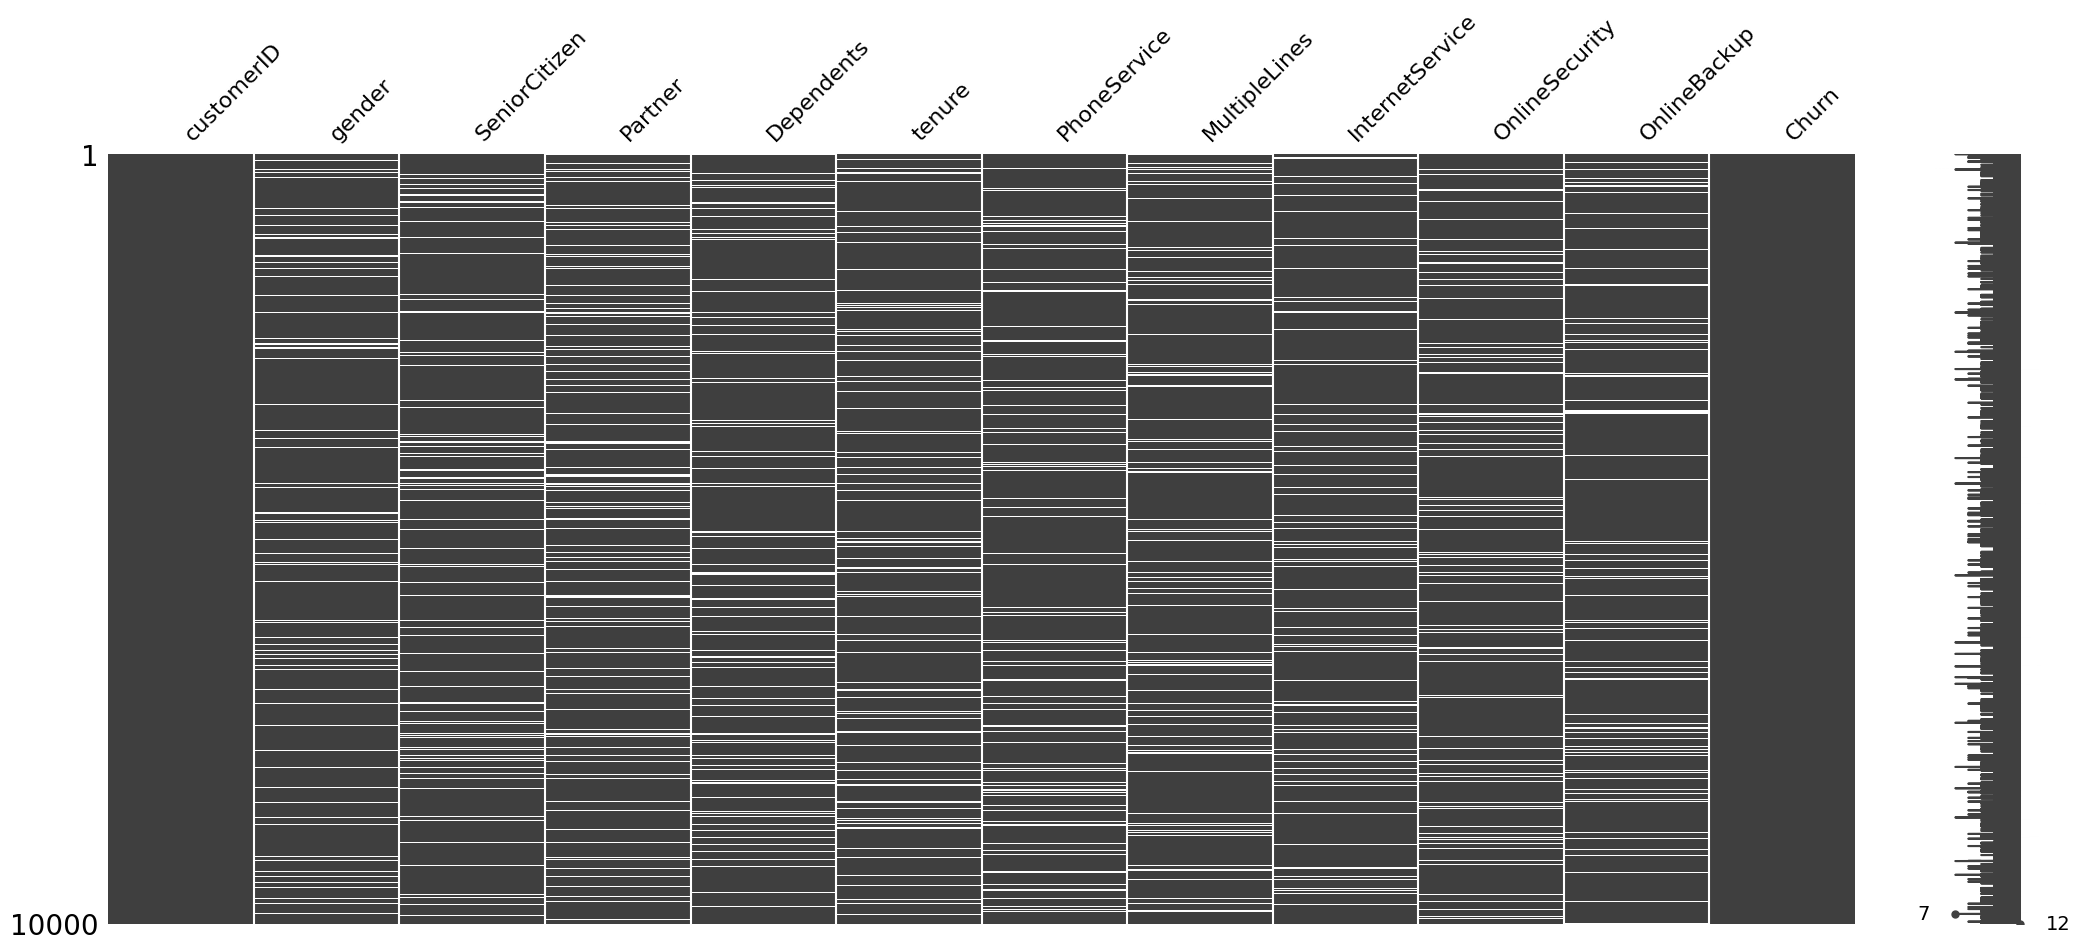

In [12]:
# Checking for missing values
missing_values = dataset.isnull().sum()
print("Missing values per column:\n", missing_values)

# Visualizing missing values
msno.matrix(dataset)
plt.show()

### Handling categorical values

We are filling out missing values with the most frequent in column.
The idea to choose this approach was mostly the categorical values are "Yes" and "No" types so it is not recommended that we firsly encode them numerically and then try to fill out mean with classes.

In [13]:
# Imputing missing categorical values with the most frequent category
categorical_columns = dataset.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
dataset[categorical_columns] = imputer.fit_transform(dataset[categorical_columns])


In [14]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Churn
0,Cust_1,Male,0.0,Yes,No,2.0,Yes,No,Fiber optic,No,No internet service,1
1,Cust_2,Female,1.0,No,No,NaN,Yes,No,Fiber optic,Yes,Yes,0
2,Cust_3,Male,0.0,No,Yes,NaN,No,Yes,Fiber optic,No,No,0
3,Cust_4,Male,1.0,No,No,13.0,Yes,No phone service,Fiber optic,No,No,0
4,Cust_5,Male,1.0,Yes,Yes,55.0,No,No,Fiber optic,Yes,Yes,1


### Handling numerical values
We are filling out missing values with mean of that column

In [15]:
# Handling missing values using mean/mode/median depending on the nature of the data
imputer = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' as needed
dataset[numerical_df.columns] = imputer.fit_transform(dataset[numerical_df.columns])

In [16]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Churn
0,Cust_1,Male,0.0,Yes,No,2.000000,Yes,No,Fiber optic,No,No internet service,1.0
1,Cust_2,Female,1.0,No,No,36.459889,Yes,No,Fiber optic,Yes,Yes,0.0
2,Cust_3,Male,0.0,No,Yes,36.459889,No,Yes,Fiber optic,No,No,0.0
3,Cust_4,Male,1.0,No,No,13.000000,Yes,No phone service,Fiber optic,No,No,0.0
4,Cust_5,Male,1.0,Yes,Yes,55.000000,No,No,Fiber optic,Yes,Yes,1.0


### Dataset after handling missing values

Missing values per column:
 customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
OnlineBackup       0
Churn              0
dtype: int64


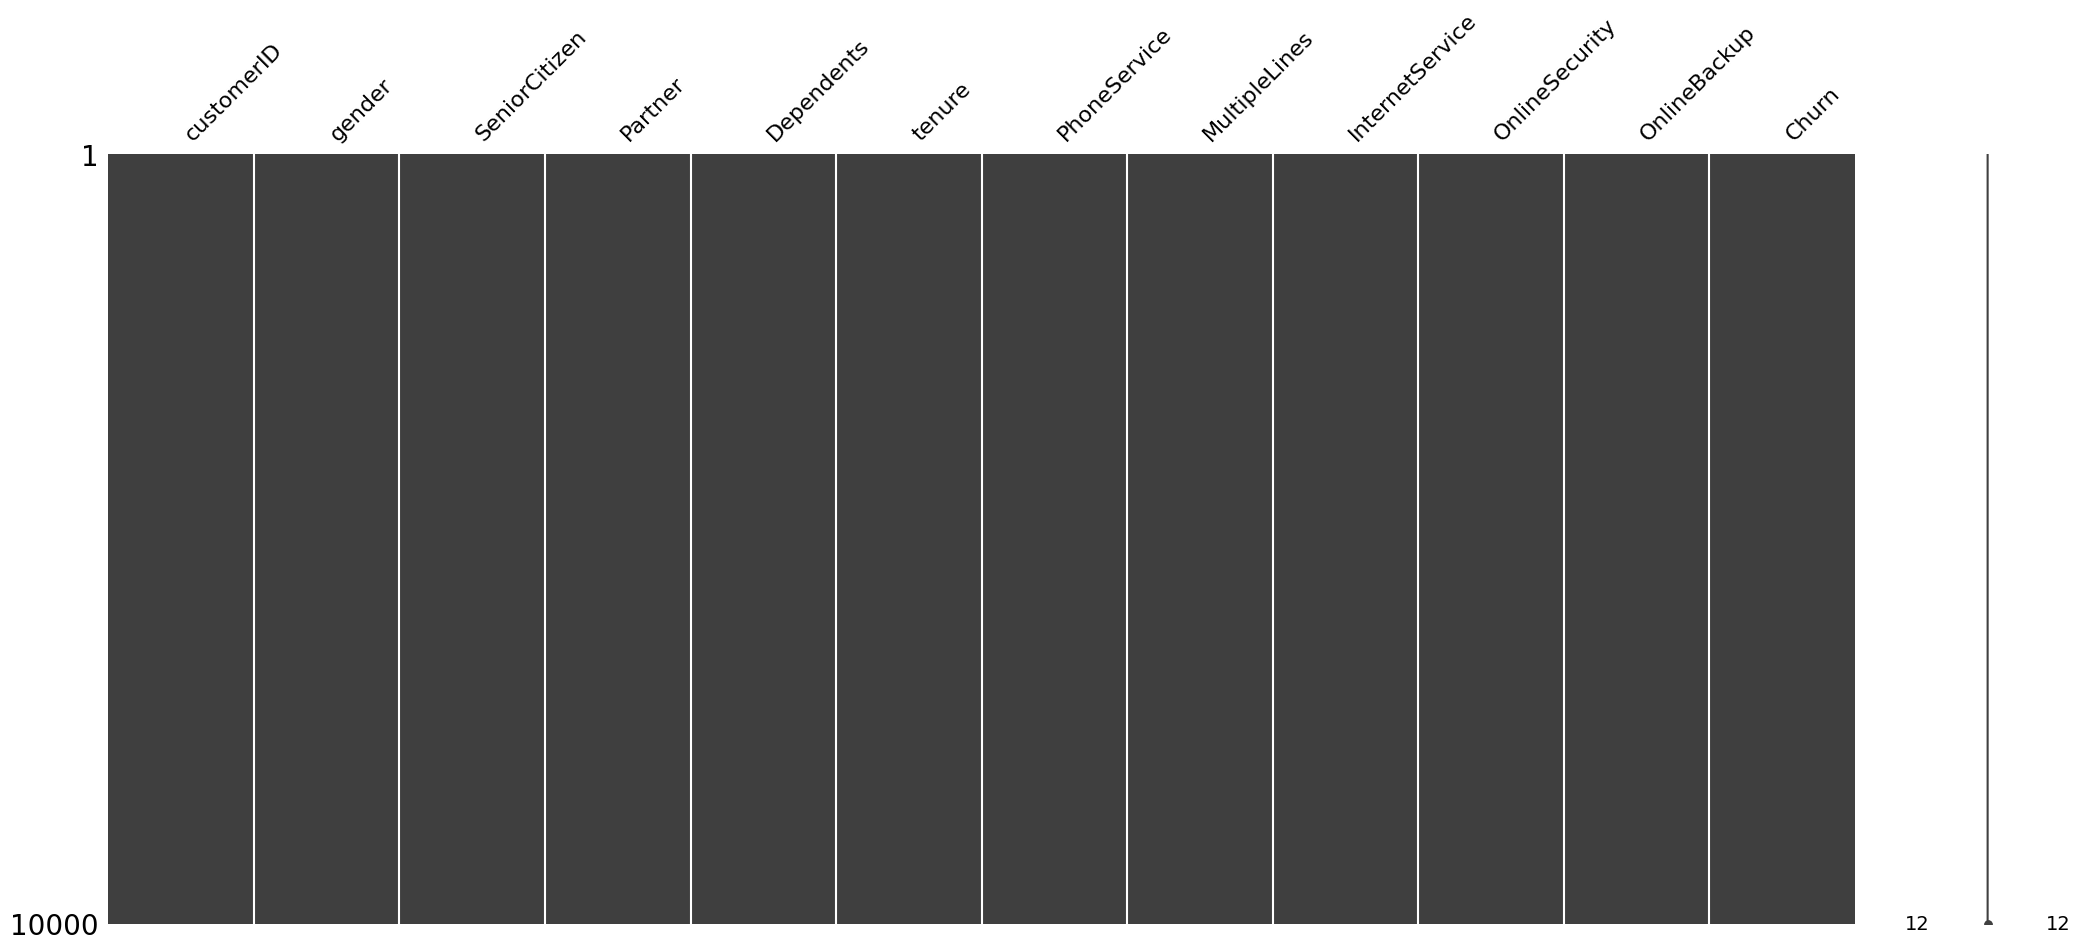

In [17]:
# Checking for missing values
missing_values = dataset.isnull().sum()
print("Missing values per column:\n", missing_values)

# Visualizing missing values
msno.matrix(dataset)
plt.show()

We can see that there are no missing values now...
Lets move towards encoding categorical values and normalization of numerical values.

In [18]:
dataset=dataset.drop(columns=['customerID'])

In [19]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Churn
0,Male,0.0,Yes,No,2.000000,Yes,No,Fiber optic,No,No internet service,1.0
1,Female,1.0,No,No,36.459889,Yes,No,Fiber optic,Yes,Yes,0.0
2,Male,0.0,No,Yes,36.459889,No,Yes,Fiber optic,No,No,0.0
3,Male,1.0,No,No,13.000000,Yes,No phone service,Fiber optic,No,No,0.0
4,Male,1.0,Yes,Yes,55.000000,No,No,Fiber optic,Yes,Yes,1.0


In [20]:
categorical_columns=['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

In [21]:
from sklearn.preprocessing import OneHotEncoder

# Apply One-Hot Encoding to categorical columns
df_encoded = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

In [22]:
df_encoded.head()

,SeniorCitizen,tenure,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes
0,0.0,2.000000,1.0,True,True,False,True,False,False,True,False,False,False,True,False
1,1.0,36.459889,0.0,False,False,False,True,False,False,True,False,False,True,False,True
2,0.0,36.459889,0.0,True,False,True,False,False,True,True,False,False,False,False,False
3,1.0,13.000000,0.0,True,False,False,True,True,False,True,False,False,False,False,False
4,1.0,55.000000,1.0,True,True,True,False,False,False,True,False,False,True,False,True


In [23]:
# Identifying skewed features
skewness = df_encoded.skew().sort_values(ascending=False)
print("Skewness of features:\n", skewness)

# Applying log transformation to positively skewed features
skewed_features = skewness[skewness > 0.5].index
df_encoded[skewed_features] = np.log1p(df_encoded[skewed_features])


Skewness of features:
 InternetService_No                    0.906570
MultipleLines_Yes                     0.899173
OnlineSecurity_No internet service    0.890757
OnlineBackup_Yes                      0.885517
OnlineBackup_No internet service      0.880292
OnlineSecurity_Yes                    0.395997
MultipleLines_No phone service        0.395150
InternetService_Fiber optic           0.389646
PhoneService_Yes                      0.237696
Partner_Yes                           0.210385
Dependents_Yes                        0.205913
tenure                                0.003687
SeniorCitizen                        -0.000469
Churn                                -0.008001
gender_Male                          -0.203881
dtype: float64


In [24]:
df_encoded.head()

,SeniorCitizen,tenure,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes
0,0.0,2.000000,1.0,True,True,False,True,False,0.000000,True,0.0,0.0,False,0.693359,0.000000
1,1.0,36.459889,0.0,False,False,False,True,False,0.000000,True,0.0,0.0,True,0.000000,0.693359
2,0.0,36.459889,0.0,True,False,True,False,False,0.693359,True,0.0,0.0,False,0.000000,0.000000
3,1.0,13.000000,0.0,True,False,False,True,True,0.000000,True,0.0,0.0,False,0.000000,0.000000
4,1.0,55.000000,1.0,True,True,True,False,False,0.000000,True,0.0,0.0,True,0.000000,0.693359


In [25]:
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [28]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.5025
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.48      0.49       996
         1.0       0.50      0.53      0.52      1004

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

Logistic Regression Confusion Matrix:
 [[474 522]
 [473 531]]


In [29]:
# Initialize the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Predict on the test set
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dtree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))

Decision Tree Accuracy: 0.492
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.52      0.50       996
         1.0       0.49      0.47      0.48      1004

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000

Decision Tree Confusion Matrix:
 [[515 481]
 [535 469]]


In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid for Decision Tree
dtree_param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # Control the depth of the tree
    'min_samples_split': [2, 5, 10],          # Control when a node should be split
    'min_samples_leaf': [1, 2, 4],            # Control the minimum number of samples at a leaf node
    'max_features': [None, 'sqrt', 'log2'],   # Control the number of features to consider when looking for the best split
}

# Initialize Grid Search with 5-fold cross-validation
grid_search_dtree = GridSearchCV(DecisionTreeClassifier(random_state=42), dtree_param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_dtree.fit(X_train, y_train)

# Best hyperparameters
best_dtree_params = grid_search_dtree.best_params_
print("Best Hyperparameters for Decision Tree:", best_dtree_params)

# Predict using the best model
y_pred_best_dtree = grid_search_dtree.predict(X_test)

# Evaluate the best model
print("Best Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best_dtree))
print("Best Decision Tree Classification Report:\n", classification_report(y_test, y_pred_best_dtree))
print("Best Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_dtree))


Best Hyperparameters for Decision Tree: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Decision Tree Accuracy: 0.5065
Best Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.55      0.53       996
         1.0       0.51      0.46      0.49      1004

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000

Best Decision Tree Confusion Matrix:
 [[548 448]
 [539 465]]


In [31]:
# Define the parameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # solvers that support both 'l1' and 'l2'
    'penalty': ['l1', 'l2']           # Penalties supported by 'liblinear' and 'saga'
}

# Initialize Grid Search with 5-fold cross-validation
grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), logreg_param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search_logreg.fit(X_train, y_train)

# Best hyperparameters
best_logreg_params = grid_search_logreg.best_params_
print("Best Hyperparameters for Logistic Regression:", best_logreg_params)

# Predict using the best model
y_pred_best_logreg = grid_search_logreg.predict(X_test)

# Evaluate the best model
print("Best Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best_logreg))
print("Best Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_best_logreg))
print("Best Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_logreg))


Best Hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.5045
Best Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.48      0.49       996
         1.0       0.51      0.53      0.52      1004

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

Best Logistic Regression Confusion Matrix:
 [[478 518]
 [473 531]]


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the k-NN classifier
knn_clf = KNeighborsClassifier()

# Train the model
knn_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("k-NN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("k-NN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


k-NN Accuracy: 0.504
k-NN Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.52      0.51       996
         1.0       0.51      0.49      0.50      1004

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

k-NN Confusion Matrix:
 [[513 483]
 [509 495]]


In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan distance and Euclidean distance
}

# Initialize Grid Search with 5-fold cross-validation
grid_search_knn = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_knn.fit(X_train, y_train)

# Best hyperparameters
best_knn_params = grid_search_knn.best_params_
print("Best Hyperparameters for k-NN:", best_knn_params)

# Predict using the best model
y_pred_best_knn = grid_search_knn.predict(X_test)

# Evaluate the best model
print("Best k-NN Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("Best k-NN Classification Report:\n", classification_report(y_test, y_pred_best_knn))
print("Best k-NN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_knn))


Best Hyperparameters for k-NN: {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Best k-NN Accuracy: 0.487
Best k-NN Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.49      0.49       996
         1.0       0.49      0.48      0.48      1004

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000

Best k-NN Confusion Matrix:
 [[493 503]
 [523 481]]


In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM classifier
svm_clf = SVC()

# Train the model
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.485
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.72      0.58       996
         1.0       0.48      0.25      0.33      1004

    accuracy                           0.48      2000
   macro avg       0.48      0.49      0.45      2000
weighted avg       0.48      0.48      0.45      2000

SVM Confusion Matrix:
 [[722 274]
 [756 248]]


In [35]:
from sklearn.neural_network import MLPClassifier

mlp_model= MLPClassifier()

mlp_model.fit(X_train, y_train)

MLPClassifier()

In [36]:
Y_pred_mlp= mlp_model.predict(X_test)

In [37]:
# Evaluate the model
print("MLP Accuracy:", accuracy_score(y_test, Y_pred_mlp))
print("MLP Classification Report:\n", classification_report(y_test, Y_pred_mlp))
print("MLP Confusion Matrix:\n", confusion_matrix(y_test, Y_pred_mlp))

MLP Accuracy: 0.4945
MLP Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.45      0.47       996
         1.0       0.50      0.54      0.52      1004

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000

MLP Confusion Matrix:
 [[444 552]
 [459 545]]
